In [277]:
from linares_plot import *
import statsmodels.formula.api as smf
import os


In [278]:
file='Gala C_task_2021-04-10_12h24.00.778.csv'
file_path = os.getcwd() + '\\data_to_convert\\' + file
df = pd.read_csv(file_path)

In [279]:
df['mouse.x'] = df['mouse.x'].replace(df['mouse.x'].iloc[-1], 0)
df['mouse.y'] = df['mouse.y'].replace(df['mouse.y'].iloc[-1], 0)
df['mouse_2.x'] = df['mouse_2.x'].replace(df['mouse_2.x'].iloc[0], 0)
df['mouse_2.y'] = df['mouse_2.y'].replace(df['mouse_2.y'].iloc[0], 0)
df['mouse_3.x'] = df['mouse_3.x'].replace(df['mouse_3.x'].iloc[0], 0)
df['mouse_3.y'] = df['mouse_3.y'].replace(df['mouse_3.y'].iloc[0], 0)
df['x_resp'] = df['mouse.x'] + df['mouse_2.x']  + df['mouse_3.x']
df['y_resp'] = df['mouse.y'] + df['mouse_2.y']  + df['mouse_3.y']

In [280]:
df_ = df[['target_angle', 'load', 'delay',
        'x_resp', 'y_resp']].iloc[0:-1, :]

In [281]:
df_

,target_angle,load,delay,x_resp,y_resp
0,135.0,3.0,1.0,-0.324219,0.259115
1,90.0,3.0,1.0,-0.054688,0.311198
2,270.0,7.0,1.0,0.244792,-0.160156
3,180.0,7.0,1.0,-0.240885,-0.024740
4,45.0,3.0,1.0,0.290365,0.180990
5,180.0,7.0,1.0,-0.287760,0.131510
6,180.0,7.0,1.0,-0.324219,-0.001302
7,45.0,7.0,1.0,0.065104,0.342448
8,315.0,7.0,1.0,0.222656,-0.207031
9,135.0,7.0,1.0,-0.257812,0.263021


In [282]:
##convert the coordinates to the actual response
pos0 = [0.4, 0]
pos45=[0.25,0.25]
pos90=[0,0.4]
pos135=[-0.25,0.25]
pos180=[-0.4,0]
pos225=[-0.25,-0.25]
pos270=[0,-0.4]
pos315=[0.25,-0.25]

coordinates_=[pos0, pos45, pos90, pos135, pos180, pos225, pos270, pos315]
coordinates_angles=[0.,45.,90.,135.,180.,225.,270.,315.]

def euclidean_distance(p1, p2):
    #p1=np.array([0,0.5])
    #p2=np.array([-0.1,0.4])
    return np.sqrt(np.sum(np.square(p1 - p2)))


responses=[]
modules=[]

for i in range(len(df_)):
    coordinates_resp = np.array([df_.iloc[i].x_resp, df_.iloc[i].y_resp])
    eucl_dists = [euclidean_distance(coordinates_resp, coordinates_[i]) for i in range(len(coordinates_))]
    responded_angle = coordinates_angles[np.where(eucl_dists==min(eucl_dists))[0][0]]
    responses.append(responded_angle)
    #####
    Ptraget = coordinates_[np.where(df_.iloc[i].target_angle==coordinates_angles)[0][0]]
    mod = euclidean_distance(coordinates_resp, Ptraget)
    modules.append(mod)

##

df_['responded'] = responses
df_['module'] = modules

In [283]:
df_.head(5)

,target_angle,load,delay,x_resp,y_resp,responded,module
0,135.0,3.0,1.0,-0.324219,0.259115,135.0,0.074776
1,90.0,3.0,1.0,-0.054688,0.311198,90.0,0.104291
2,270.0,7.0,1.0,0.244792,-0.160156,315.0,0.342707
3,180.0,7.0,1.0,-0.240885,-0.024740,180.0,0.161026
4,45.0,3.0,1.0,0.290365,0.180990,45.0,0.079948


In [284]:
##column for correct
df_['Correct'] = df_['target_angle'] == df_['responded']
df_['Correct'] = df_['Correct'] *1

df_.head(5)


,target_angle,load,delay,x_resp,y_resp,responded,module,Correct
0,135.0,3.0,1.0,-0.324219,0.259115,135.0,0.074776,1
1,90.0,3.0,1.0,-0.054688,0.311198,90.0,0.104291,1
2,270.0,7.0,1.0,0.244792,-0.160156,315.0,0.342707,0
3,180.0,7.0,1.0,-0.240885,-0.024740,180.0,0.161026,1
4,45.0,3.0,1.0,0.290365,0.180990,45.0,0.079948,1


In [285]:
##load, delay, x_resp, y_resp, x_target, y_target

In [286]:
##plots
df_['delay_label'] = df_['delay'].replace([1,4,7], ['delay 1', 'delay 4',  'delay 7'] )

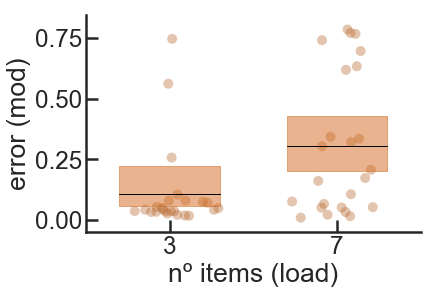

                            OLS Regression Results                            
Dep. Variable:                 module   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     8.284
Date:                Sat, 10 Apr 2021   Prob (F-statistic):            0.00605
Time:                        12:55:36   Log-Likelihood:                 1.3488
No. Observations:                  48   AIC:                             1.302
Df Residuals:                      46   BIC:                             5.045
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0437      0.093     -0.468      0.6

In [287]:
linares_plot(x='load', y='module', df=df_, order=[3,7], 
              palette=['chocolate'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')
plt.show()

mod = smf.ols(formula='module ~ load', data=df_)
res = mod.fit()
print(res.summary())

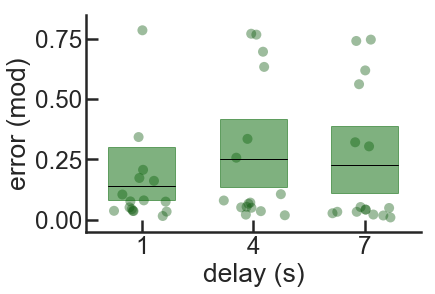

                            OLS Regression Results                            
Dep. Variable:                 module   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8671
Date:                Sat, 10 Apr 2021   Prob (F-statistic):              0.357
Time:                        12:55:39   Log-Likelihood:                -2.1772
No. Observations:                  48   AIC:                             8.354
Df Residuals:                      46   BIC:                             12.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1492      0.071      2.087      0.0

In [288]:
linares_plot(x='delay', y='module', df=df_, order=[1,4,7], 
              palette=['darkgreen'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('delay (s)')
plt.show()

mod = smf.ols(formula='module ~ delay', data=df_)
res = mod.fit()
print(res.summary())

In [289]:
df_

,target_angle,load,delay,x_resp,y_resp,responded,module,Correct,delay_label
0,135.0,3.0,1.0,-0.324219,0.259115,135.0,0.074776,1,delay 1
1,90.0,3.0,1.0,-0.054688,0.311198,90.0,0.104291,1,delay 1
2,270.0,7.0,1.0,0.244792,-0.160156,315.0,0.342707,0,delay 1
3,180.0,7.0,1.0,-0.240885,-0.024740,180.0,0.161026,1,delay 1
4,45.0,3.0,1.0,0.290365,0.180990,45.0,0.079948,1,delay 1
5,180.0,7.0,1.0,-0.287760,0.131510,135.0,0.172895,0,delay 1
6,180.0,7.0,1.0,-0.324219,-0.001302,180.0,0.075792,1,delay 1
7,45.0,7.0,1.0,0.065104,0.342448,90.0,0.206720,0,delay 1
8,315.0,7.0,1.0,0.222656,-0.207031,315.0,0.050931,1,delay 1
9,135.0,7.0,1.0,-0.257812,0.263021,135.0,0.015185,1,delay 1


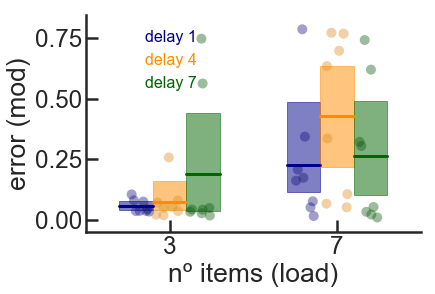

                            OLS Regression Results                            
Dep. Variable:                 module   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.159
Date:                Sat, 10 Apr 2021   Prob (F-statistic):             0.0339
Time:                        12:55:45   Log-Likelihood:                 2.0558
No. Observations:                  48   AIC:                             3.888
Df Residuals:                      44   BIC:                             11.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1819      0.180     -1.010      0.3

In [290]:

linares_plot(x='load', y='module', hue='delay_label', df=df_, order=[3,7], 
             hue_order=['delay 1', 'delay 4', 'delay 7'], palette=['darkblue', 'darkorange', 'darkgreen'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')
plt.show()

mod = smf.ols(formula='module ~ delay*load', data=df_)
res = mod.fit()
print(res.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\linares_plot.py:158: InstabilityWarning: BCa acceleration values for indexes (array([0], dtype=int64),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], statfunction=statistic,  alpha=1-CI, n_samples=reps)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\linares_plot.py:158: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], statfunction=statistic,  alpha=1-CI, n_samples=reps)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\linares_plot.py:158: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], statfunction=statistic,  alpha=1-CI, n_samples

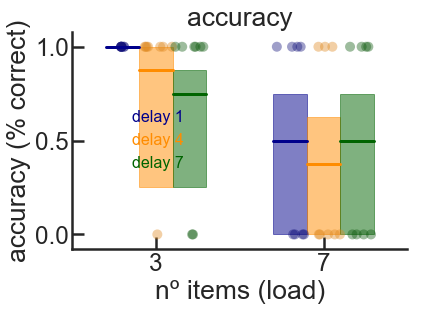

                            OLS Regression Results                            
Dep. Variable:                 module   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.159
Date:                Sat, 10 Apr 2021   Prob (F-statistic):             0.0339
Time:                        12:55:54   Log-Likelihood:                 2.0558
No. Observations:                  48   AIC:                             3.888
Df Residuals:                      44   BIC:                             11.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1819      0.180     -1.010      0.3

In [291]:
linares_plot(x='load', y='Correct', hue='delay_label', df=df_, order=[3,7], 
             hue_order=['delay 1', 'delay 4', 'delay 7'], 
             palette=['darkblue', 'darkorange', 'darkgreen'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('accuracy (% correct)')
plt.xlabel('nº items (load)')
plt.title('accuracy')
plt.show()

mod = smf.ols(formula='module ~ delay*load', data=df_)
res = mod.fit()
print(res.summary())

